In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=101, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

**Feature Importance**

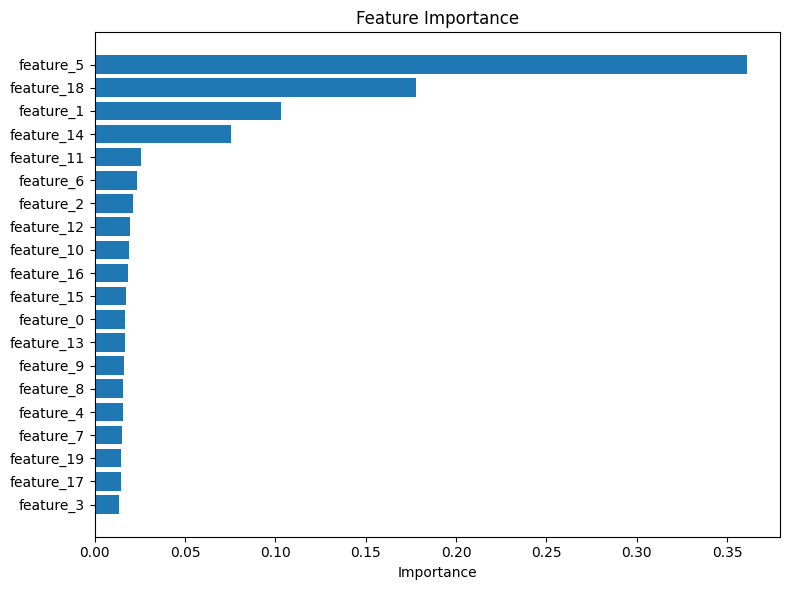

In [4]:
feature_importance = pd.DataFrame({
    'feature' : [f'feature_{i}' for i in range(x_train.shape[1])],
    'importance' : model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**SHAP Values**

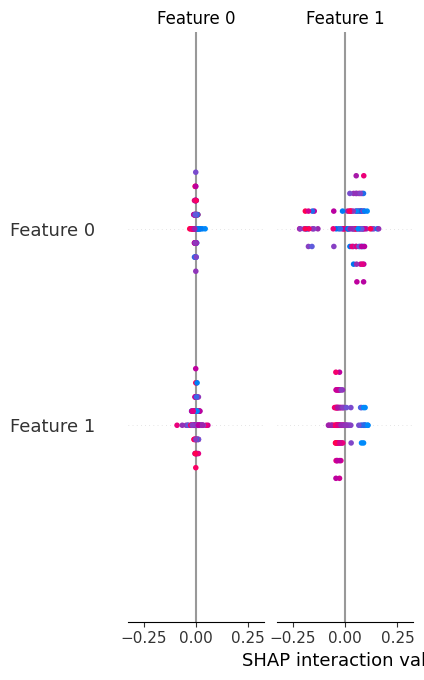

In [10]:
# Create SHAP explainer
explainer = shap.TreeExplainer(model)
shape_values = explainer.shap_values(x_test[:100])

shap.summary_plot(shape_values, x_test[:100], plot_type='bar')

**Permutation Importance**

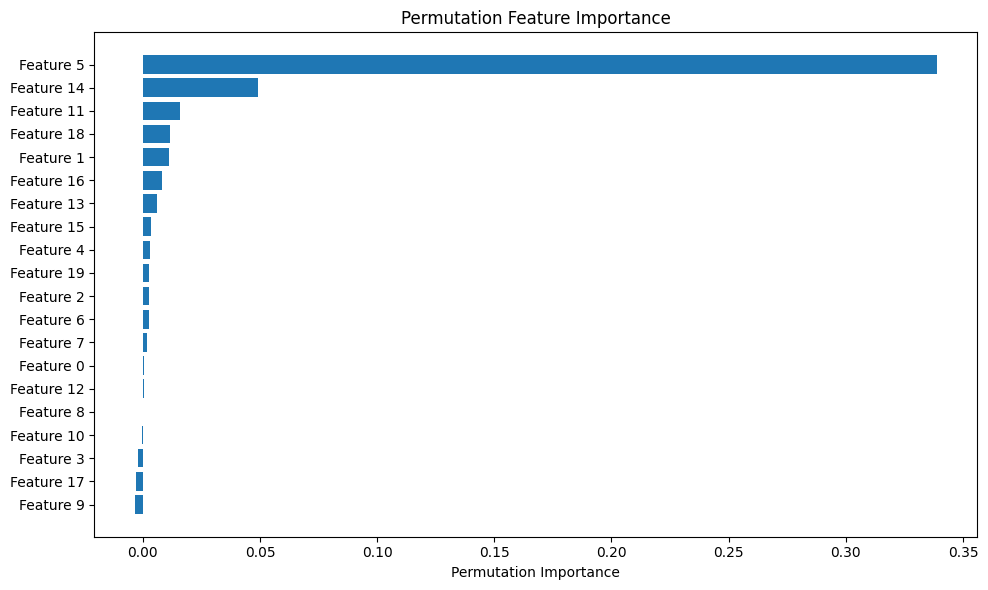

In [11]:
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42, scoring='f1')

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [f'Feature {i}' for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()